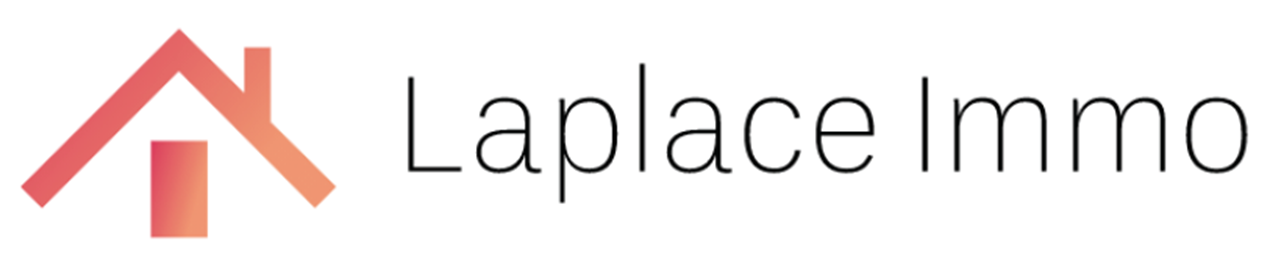

# Base de Données DATAImmo
# Upload des données dans la base


In [1]:
# import librairies needed for project

import numpy as np
import pandas as pd
import mysql.connector as connector
from mysql.connector import Error
from datetime import datetime

In [2]:
# initiate connection to database
# check & replace connection options based on your local settings

try:
    connection = connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="1234",
    auth_plugin='mysql_native_password',
    database="dataimmo",
    autocommit=True)
    if connection.is_connected():
        print("Connection to dataimmo database successful !")
        
except Error as e:
    print("Error while connecting to dataimmo database", e)

Connection to dataimmo database successful !


In [3]:
# create a cursor instance

cursor = connection.cursor()

In [4]:
# import data files - these must be saved in the same directory as this Jupyter notebook otherwise the import will fail
# for each file, display size (lines & columns) - check in MySQL workbench that all lines have been imported by calling
# SELECT * FROM <table_name> # on the relevant table after import or checking the import message in the output panel in
# MySQL Workbench

bien = pd.read_csv('bien.csv', encoding='latin-1')
print("Le fichier bien.csv comporte", bien.shape[0],"lignes et", bien.shape[1]," colonnes.")
commune =  pd.read_csv('commune.csv', encoding='latin-1')
print("Le fichier commune.csv comporte", commune.shape[0],"lignes et", commune.shape[1]," colonnes.")
departement = pd.read_csv('departement.csv', encoding='latin-1')
print("Le fichier departement.csv comporte", departement.shape[0],"lignes et", departement.shape[1]," colonnes.")
mutation = pd.read_csv('mutation.csv', encoding='latin-1')
print("Le fichier mutation.csv comporte", mutation.shape[0],"lignes et", mutation.shape[1]," colonnes.")
ref_dep = pd.read_csv('ref_dep.csv', encoding='latin-1')
print("Le fichier ref_dep.csv comporte", ref_dep.shape[0],"lignes et", ref_dep.shape[1]," colonnes.")
region = pd.read_csv('region.csv', encoding='latin-1')
print("Le fichier region.csv comporte", region.shape[0],"lignes et", region.shape[1]," colonnes.")

Le fichier bien.csv comporte 34159 lignes et 6  colonnes.
Le fichier commune.csv comporte 34991 lignes et 4  colonnes.
Le fichier departement.csv comporte 109 lignes et 2  colonnes.
Le fichier mutation.csv comporte 34165 lignes et 6  colonnes.
Le fichier ref_dep.csv comporte 109 lignes et 2  colonnes.
Le fichier region.csv comporte 19 lignes et 2  colonnes.


In [5]:
# rename columns to get rid of some UTF8 decoding issues

bien.rename(columns={'ï»¿com_code': 'com_code'}, inplace=True)
departement.rename(columns={'ï»¿dep_code': 'dep_code'}, inplace=True)
mutation.rename(columns={'ï»¿No disposition': 'mut_numdisp', 'Date mutation':'mut_date','Nature mutation':'mut_type','Valeur fonciere':'mut_val'}, inplace=True)

In [6]:
# change format date column to MySQL standard format

mutation.mut_date = pd.to_datetime(mutation.mut_date, format='%d/%m/%Y').dt.strftime('%Y-%m-%d')

In [7]:
# reorder columns to match database

bien_final = bien[['bien_id', 'com_code', 'bien_type', 'bien_carrez_1','bien_surfbat','bien_numpieces']].copy()
commune_final = commune[['com_code', 'dep_code', 'com_nom', 'com_poptot']].copy()
departement_final = departement.copy()
mutation_final = mutation[['bien_id','mut_date','mut_numdisp','mut_type','mut_val']].copy()
ref_dep_final = ref_dep.copy()
region_final = region.copy()

In [8]:
# export data files to .csv file in location accessible to MySQL workbench - the path may differ on your own computer

bien_final.to_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/bien.csv', index=False, encoding='latin_1')
commune_final.to_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/commune.csv', index=False, encoding='latin_1')
departement_final.to_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/departement.csv', index=False, encoding='latin_1')
mutation_final.to_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/mutation.csv', index=False, encoding='latin_1')
ref_dep_final.to_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/ref_dep.csv', index=False, encoding='latin_1')
region_final.to_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/region.csv', index=False, encoding='latin_1')

In [9]:
# create MySQL statements to upload each .csv file into the relevant database table

load_bien = "LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/bien.csv' INTO TABLE bien CHARACTER SET latin1 FIELDS TERMINATED BY ',' IGNORE 1 ROWS"
load_commune = "LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/commune.csv' INTO TABLE commune CHARACTER SET latin1 FIELDS TERMINATED BY ',' IGNORE 1 ROWS"
load_departement = "LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/departement.csv' INTO TABLE departement CHARACTER SET latin1 FIELDS TERMINATED BY ',' IGNORE 1 ROWS"
load_mutation = "LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/mutation.csv' INTO TABLE mutation CHARACTER SET latin1 FIELDS TERMINATED BY ',' IGNORE 1 ROWS"
load_ref_dep = "LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/ref_dep.csv' INTO TABLE ref_dep CHARACTER SET latin1 FIELDS TERMINATED BY ',' IGNORE 1 ROWS"
load_region = "LOAD DATA INFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/region.csv' INTO TABLE region CHARACTER SET latin1 FIELDS TERMINATED BY ',' IGNORE 1 ROWS"

In [10]:
# set foreign key checks to FALSE (so the order in which you import tables is irrelevant)

cursor.execute("SET FOREIGN_KEY_CHECKS=0")

# execute data upload statements (no need for a COMMIT statement as we set the autocommit option to TRUE when establishing
# the connection)

cursor.execute(load_region)
cursor.execute(load_ref_dep)
cursor.execute(load_departement)
cursor.execute(load_commune)
cursor.execute(load_bien)
cursor.execute(load_mutation)

# set foreign key checks back to TRUE

cursor.execute("SET FOREIGN_KEY_CHECKS=1")

In [11]:
# close the connection

connection.close()